## Instructions
1. **Write your name** at the top!
2. Feel free to add new code cells as needed
3. Use Quarto to generate html from the notebook for your submission

## Import libraries & Read datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/credit_train.csv")
test = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/credit_test.csv")

In [3]:
train.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,37.728,2525,192,1,44,13,No,No,Yes,South,0
1,27.578,2531,195,1,34,15,Yes,No,Yes,South,0
2,41.192,3673,297,3,54,16,Yes,No,Yes,South,121
3,149.316,10278,707,1,80,16,No,No,No,East,1107
4,76.348,4697,344,4,60,18,No,No,No,West,108


In [4]:
test.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
1,104.593,7075,514,4,71,11,No,No,No,West,580
2,148.924,9504,681,3,36,11,Yes,No,No,West,964
3,71.408,7114,512,2,87,9,No,No,No,West,872
4,20.089,2525,200,3,57,15,Yes,No,Yes,East,0


## Q18

In [5]:
model = smf.ols(formula = "Balance ~ Income + Rating + Limit + Cards", data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     551.7
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          1.49e-135
Time:                        17:34:22   Log-Likelihood:                -1955.6
No. Observations:                 300   AIC:                             3921.
Df Residuals:                     295   BIC:                             3940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -467.8591     37.245    -12.562      0.000    -541.159    -394.560
Income        -7.5478      0.456    -16.557      0.000      -8.445      -6.651
Rating         1.7730      0.931      1.904      0.058      -0.059       3.605
Limit          0.1451      0.062      2.331      0.020       0.023       0.268
Cards          7.0045      8.250      0.849      0.397      -9.231      23.240
==============================================================================
Omnibus:                       68.629   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.170
Skew:                           1.327   Prob(JB):                     2.66e-25
Kurtosis:                       4.420   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Q19

In [18]:
# print R^2

print(model.rsquared)

rmse_train = np.sqrt(mean_squared_error(train['Balance'], model.fittedvalues))
print(rmse_train)

pred_balance = model.predict(test)
rmse_test = np.sqrt(mean_squared_error(test['Balance'], pred_balance))
print(rmse_test)

0.8820862502123564
163.9813815134106
153.587404392


## Q20

In [12]:
print(mean_absolute_error(test['Balance'], pred_balance))
print(rmse_test)

117.59229599615867
153.587404392


Text(0, 0.5, 'Residuals')

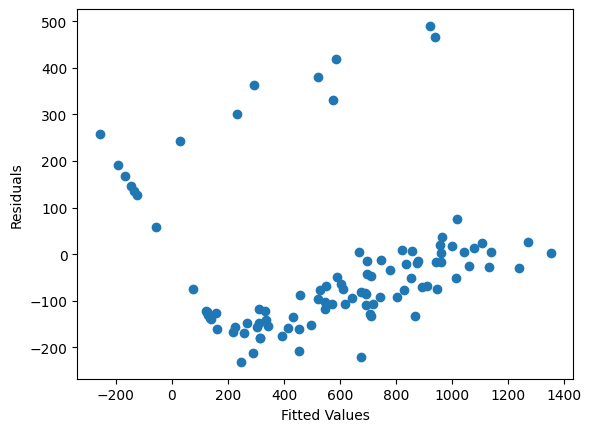

In [17]:
test_resid = test['Balance'] - pred_balance
# plot fitted values vs residuals and label axes
plt.scatter(pred_balance, test_resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

## Q21

In [16]:
model_updated = smf.ols(formula = "Balance ~ Income + Limit + Cards + C(Region) + C(Married) + C(Own) + C(Student)", data = train).fit()
model_updated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     790.5
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          1.90e-192
Time:                        17:48:11   Log-Likelihood:                -1807.7
No. Observations:                 300   AIC:                             3633.
Df Residuals:                     291   BIC:                             3667.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -490.3240     23.354    -20.995      0.000    -536.288    -444.360
C(Region)[T.South]    11.2749     15.074      0.748      0.455     -18.393      40.943
C(Region)[T.West]     15.1970     17.260      0.880      0.379     -18.774      49.168
C(Married)[T.Yes]     -6.6962     12.268     -0.546      0.586     -30.840      17.448
C(Own)[T.Yes]        -14.8811     11.793     -1.262      0.208     -38.092       8.330
C(Student)[T.Yes]    425.0358     19.218     22.117      0.000     387.212     462.859
Income                -7.5377      0.280    -26.905      0.000      -8.089      -6.986
Limit                  0.2637      0.004     62.798      0.000       0.255       0.272
Cards                 22.6195      4.286      5.278      0.000      14.184      31.055
==============================================================================
Omnibus:                       16.740   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.572
Skew:                           0.608   Prob(JB):                     9.27e-05
Kurtosis:                       2.907   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Q22

In [22]:
# do an F-test to see if the statistically insignificant predictors are actually statistically insignificant
hypothesis = "(C(Region)[T.South] = 0, C(Region)[T.West] = 0,  C(Married)[T.Yes] = 0, C(Own)[T.Yes] = 0)"
f_test = model_updated.f_test(hypothesis)
print(f_test)


<F test: F=0.6641557836550993, p=0.6173518626546108, df_denom=291, df_num=4>


## Q23

In [24]:
model_interaction = smf.ols(formula = "Balance ~ Income*C(Student) + Limit*C(Student) + Cards + C(Student)", data = train).fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1171.
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          1.86e-201
Time:                        18:02:05   Log-Likelihood:                -1793.6
No. Observations:                 300   AIC:                             3601.
Df Residuals:                     293   BIC:                             3627.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -475.2163     17.586    -27.023      0.000    -509.827    -440.606
C(Student)[T.Yes]          233.9423     42.168      5.548      0.000     150.952     316.933
Income                      -7.1440      0.290    -24.635      0.000      -7.715      -6.573
Income:C(Student)[T.Yes]    -3.0021      0.735     -4.082      0.000      -4.449      -1.555
Limit                        0.2558      0.004     60.094      0.000       0.247       0.264
Limit:C(Student)[T.Yes]      0.0705      0.013      5.616      0.000       0.046       0.095
Cards                       23.4276      4.067      5.760      0.000      15.423      31.432
==============================================================================
Omnibus:                        9.673   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.163
Skew:                           0.445   Prob(JB):                      0.00621
Kurtosis:                       2.856   Cond. No.                     4.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
print(model_interaction.params)

Intercept                  -475.216275
C(Student)[T.Yes]           233.942345
Income                       -7.144011
Income:C(Student)[T.Yes]     -3.002086
Limit                         0.255799
Limit:C(Student)[T.Yes]       0.070512
Cards                        23.427615
dtype: float64


In [26]:
beta_limit = model_interaction.params["Limit"]
beta_limit_st = model_interaction.params["Limit:C(Student)[T.Yes]"]
increase = 100*(beta_limit + beta_limit_st)
print(increase)

32.6310124644499


## Q24

In [48]:
beta_inc = model_interaction.params["Income"]
beta_inc_student = model_interaction.params["Income:C(Student)[T.Yes]"]

student_balance = 5000*(beta_limit + beta_limit_st) + 30*(beta_inc + beta_inc_student)
non_student_balance = 5000*beta_limit + 30*beta_inc

difference = student_balance - non_student_balance
print(difference)

262.4950959309492


## Q25

In [32]:
bal_predict = model_interaction.predict(test)

# split bal_predict into students and non-students
student_bal_predict = bal_predict[test['Student'] == 'Yes']
non_student_bal_predict = bal_predict[test['Student'] == 'No']

mae_student = mean_absolute_error(test['Balance'][test['Student'] == 'Yes'], student_bal_predict)
mae_non_student = mean_absolute_error(test['Balance'][test['Student'] == 'No'], non_student_bal_predict)

print(mae_student)
print(mae_non_student)

9.896724446101274
80.83730695964009


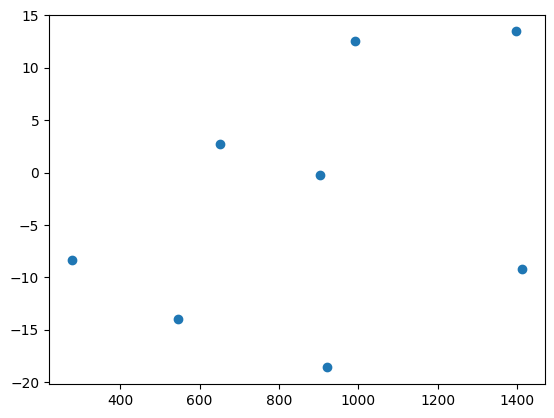

In [49]:
# plot student_bal_predict against residuals
student_resid = test['Balance'][test['Student'] == 'Yes'] - student_bal_predict
plt.scatter(student_bal_predict, student_resid)

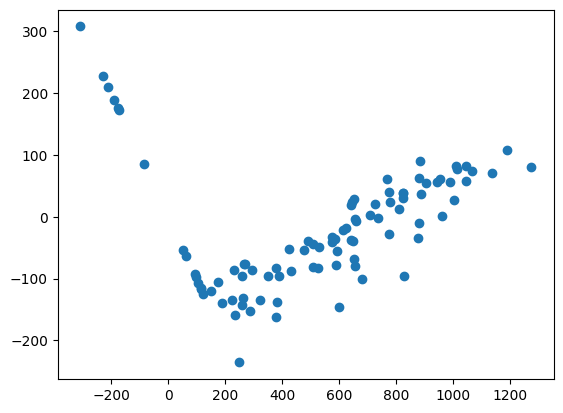

In [50]:
# plot non_student_bal_predict against residuals
non_student_resid = test['Balance'][test['Student'] == 'No'] - non_student_bal_predict
plt.scatter(non_student_bal_predict, non_student_resid)

## Q26

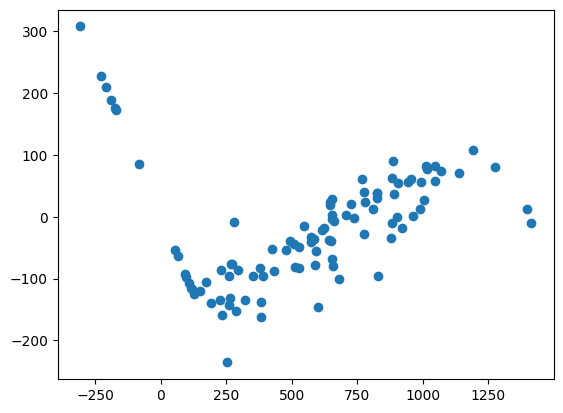

In [35]:
# plot bal_predict against residuals
resid = test['Balance'] - bal_predict
plt.scatter(bal_predict, resid)

## Q27

In [46]:
model_1 = smf.ols(formula = "Balance ~ Income", data = train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     114.8
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           7.10e-23
Time:                        18:23:57   Log-Likelihood:                -2227.4
No. Observations:                 300   AIC:                             4459.
Df Residuals:                     298   BIC:                             4466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    201.5573     37.471      5.379      0.000     127.816     275.298
Income         6.8860      0.643     10.715      0.000       5.621       8.151
==============================================================================
Omnibus:                       21.361   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.862
Skew:                           0.457   Prob(JB):                     0.000359
Kurtosis:                       2.340   Cond. No.                         93.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
model_2 = smf.ols(formula = "Balance ~ Limit + Income", data = train).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1075.
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          9.74e-137
Time:                        18:24:20   Log-Likelihood:                -1959.9
No. Observations:                 300   AIC:                             3926.
Df Residuals:                     297   BIC:                             3937.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -379.3887     21.599    -17.565      0.000    -421.895    -336.883
Limit          0.2637      0.007     38.335      0.000       0.250       0.277
Income        -7.5385      0.460    -16.401      0.000      -8.443      -6.634
==============================================================================
Omnibus:                       63.313   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.297
Skew:                           1.269   Prob(JB):                     2.74e-22
Kurtosis:                       4.225   Cond. No.                     1.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Q28